In [1]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12 dask-cudf-cu12 cuspatial-cu12 \
    cuxfilter-cu12 pylibraft-cu12 raft-dask-cu12

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [2]:
!pip install datashader

In [2]:
import cudf

df = cudf.read_csv('/tmp/query_full_scan_scale_1_rngseed_0_n2-standard-8-limit-100.csv')
# Perform any necessary preprocessing


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Normalize 'count' and map to a color
norm = plt.Normalize(df['count'].min(), df['count'].max())
colormap = plt.cm.ScalarMappable(norm=norm, cmap='viridis')

# Apply colormap to 'count' to get RGBA values
rgba_colors = colormap.to_rgba(df['count'].to_numpy())

# Convert RGBA values to a hex format
df['color'] = [mcolors.to_hex(c) for c in rgba_colors]


In [5]:
import numpy as np

def map_colors(val):
    colormap = plt.cm.viridis  # You can choose any colormap
    return colormap(val)
    
# Normalize 'count' values to be between 0 and 1
count_normalized = (df['count'] - df['count'].min()) / (df['count'].max() - df['count'].min())

In [3]:
import datashader as ds
import datashader.transfer_functions as tf

x_range = (df['timestamp'].min(), df['timestamp'].max())
y_range = (df['address'].min(), df['address'].max())

canvas = ds.Canvas(plot_width=400, plot_height=300,
                   x_range=(df['timestamp'].min(), df['timestamp'].max()),
                   y_range=(df['address'].min(), df['address'].max()))

agg = canvas.points(df, 'timestamp', 'address')

# Apply custom color mapping
img = tf.shade(agg)

# Spread the points to make them larger
spread_img = tf.spread(img, px=2, shape='square')  # Increase px for larger dots

print(x_range)
print(y_range)


(1051662070, 1141777811)
(2185376389697, 2198984987838)


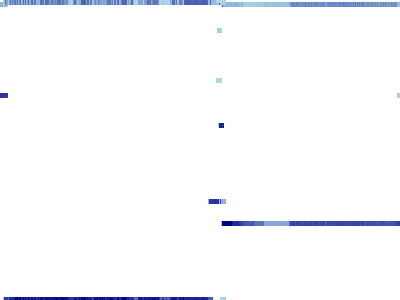

In [4]:
# Display in Jupyter Notebook
img_pil = spread_img.to_pil()
display(img_pil)

# Or save to a file
img_pil.save("time_series_plot.png")
